$$\textbf{Blatt 03 - Praktische Optimierung - Adrian Lentz, Robert}$$

Lösungen und Erklärungen für Blatt 03. $$\newline$$
Adrian Lentz - Matrikelnummer: 258882 $$\newline$$
Robert Schönewald - Matrikelnummer: 188252

$$\textbf{Aufgabe 3.1}$$


In [1]:
import numpy as np
from kompasssuche_test import kompasssuche_test
import timeit
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import statsmodels.distributions.empirical_distribution as edf

In [2]:
'Funktion definieren'

def f_a(x):
    return x[0]**2 + x[1]**2


In [3]:
np.random.seed(1)
stichprobe= random_points = np.random.uniform(-10, 10, (500, 2))   #Punkte generieren

In [4]:
'Parametereinstellungen'

parameter = [
    (1.0, 0.5),
    (2.0, 0.5),
    (1.5, 0.8),
    (0.5, 0.2)
]

In [5]:
'Zeitmessung - Definition'
def zeitmessung(f_a,x0,s0,theta):
    zeit= lambda:kompasssuche_test(f_a,x0,s0,theta)   #Lambda Funktion ersparrt definieren von zeit über funktion der Kompassuche
    return timeit.timeit(zeit,number=1)                                 #timeit.timeit gibt Messung der Laufzeit wieder


In [6]:
'Zeitmessung - Ausführung'
zeiten=[]
for i, (s0, theta) in enumerate(parameter):     #einmal alle Parameter durchgehen
    para_zeiten=[]                              #Zeiten für die jeweiligen Parameter werden hier gespeichert
    for x0 in stichprobe:
        curr_times=[]                          #Zeiten für die aktuellen zufälligen Startwerte
        for j in range(100):                   #Messung 100mal wiederholen
            curr_times.append(zeitmessung(f_a, x0, s0, theta))
        para_zeiten.append(np.median(curr_times))
    zeiten.append(para_zeiten)
print(len(zeiten[0]))  #Test der Länge, sollte 500 lang sein

500


[Text(0.5, 0, 'Parameter'), Text(0, 0.5, 'mediane Zeiten')]

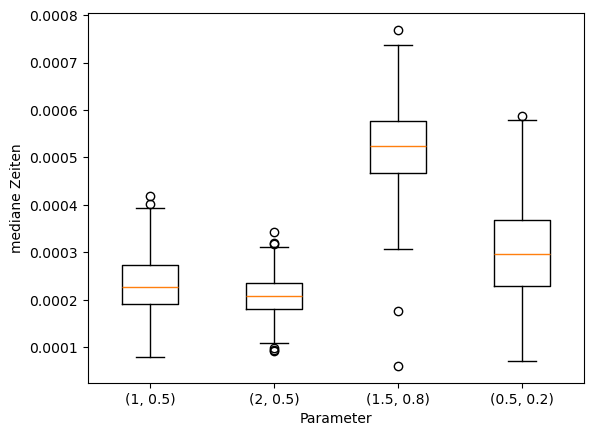

In [7]:
fig, ax = plt.subplots()
ax.boxplot(zeiten)
ax.set_xticklabels(['(1, 0.5)','(2, 0.5)','(1.5, 0.8)','(0.5, 0.2)'])
ax.set(xlabel='Parameter', ylabel='mediane Zeiten')

Die erste Sache die bei Betrachtung der Boxplots auffällt, ist dass die Parameterkombination (1.5, 0.8) deutlich höhere Zeiten erreicht als die 
anderen Parameter. Die Schrittweite wird hier am langsamsten verrringert, was dazu führt, dass viele unnötige Iterationen durchgeführt werden, da die
Schrittweite immer noch zu lang ist. Dazu kommt noch, dass die initiale Schrittweite mit 1.5 relativ hoch ist. \
Die Parameter (0.5, 0.2) erzeugen einen Boxplot mit sehr hoher Varianz, ihre schnellste und langsamste Zeit scheint mit der von allen Parameterpaaren 
übereinzustimmen. Dies lässt sich durch eine Sehr kleine initiale Schrittweite erklären. Zusätzlich wird diese auch nur sehr langsam verändert. Der
Erfolg dieser Parameter hängt stark von der Startposition ab, da bei großer Entfernung zum Optimum ein sehr langer Weg begangen werden muss, bei kleiner
Entfernung wird das Optimum bereits schnell genau gefunden.\
Die ersten beiden Paare (1, 0.5) (hier A genannt) und (2, 0.5) (hier B genannt) lassen erkennen, dass B deutlich weniger schwankt. Insgesamt scheint B 
die bessere Wahl zu sein, da der Median und die beiden Quartile unter denen von A liegen. Jedoch ist das Minimum von beiden in A. Da sich beide Paare 
nur in der initialen Schrittweite unterscheiden, lässt sich daraus schließen, dass eine größere Schrittweite meistens schneller ist, jedoch ermöglicht
eine kürzere Schrittweite das Finden des Optimums in minimaler Zeit. 

In [8]:
'Aufstellen der Hypothesen'

print('Hypothese (i):')
'H0: Parameterpaar (1,0.5) ist im Mittel langsamer oder gleich schnell als (1.5,0.8)'
'H1: Parameterpaar (1,0.5) ist im Mittel schneller als (1.5,0.8)'

print('Welch-Test:')
tstat1, p1 = scipy.stats.ttest_ind(zeiten[0],zeiten[2],equal_var=False,alternative='less')
print("t-statistic:",tstat1)
print("p-value:",p1,end="\n"+"\n")

print('Wilcoxon-Test:')
tstat1, p1 = scipy.stats.ranksums(zeiten[0],zeiten[2],alternative='less')
print("t-statistic:",tstat1)
print("p-value:",p1,end="\n"+"\n")

Hypothese (i):
Welch-Test:
t-statistic: -63.876506413638296
p-value: 0.0

Wilcoxon-Test:
t-statistic: -27.09587388755472
p-value: 5.506431433436697e-162



Hier wurde der optionale Parameter alternative der Tests auf less verändert. Damit wird die alternative Hypothese verändert, sodass nun nicht mehr auf Ungleichheit getestet wird, sondern ob Verteilung des ersten Parameters kleiner ist als die des zweiten, so wie in der Aufgabe erwünscht. Dieser Test hat sehr kleine p-Werte, weswegen es sehr wahrscheinlich ist, dass die erste Hypothese zutrifft.

In [9]:
print('Hypothese (ii):')
'H0: Parameterpaar (1.5,0.8) ist im Mittel langsamer oder gleich schnell als (0.5,0.2)'
'H1: Parameterpaar (1.5,0.8) ist im Mittel schneller als (0.5,0.2)'

print('Welch-Test:')
tstat2, p2 = scipy.stats.ttest_ind(zeiten[2],zeiten[3],equal_var=False,alternative='less')
print("t-statistic:",tstat2)
print("p-value:",p2,end="\n"+"\n")

print('Wilcoxon-Test:')
tstat2, p2 = scipy.stats.ranksums(zeiten[2],zeiten[3],alternative='less')
print("t-statistic:",tstat2)
print("p-value:",p2,end="\n"+"\n")

Hypothese (ii):
Welch-Test:
t-statistic: 36.691007952904805
p-value: 1.0

Wilcoxon-Test:
t-statistic: 24.254833068582748
p-value: 1.0



Die Testergebnisse liefern p-Werte von 1, weswegen keine Aussage über die zweite Hypothese gemacht werden kann.

In [10]:
print('Hypothese (iii):')
'H0: Parameterpaar (2,0.5) ist im Mittel langsamer oder gleich schnell als (1.5,0.8)'
'H1: Parameterpaar (2,0.5) ist im Mittel schneller als (1.5,0.8)'

print('Welch-Test:')
tstat3, p3 = scipy.stats.ttest_ind(zeiten[1],zeiten[2],equal_var=False,alternative='greater')
print("t-statistic:",tstat3)
print("p-value:",p3,end="\n"+"\n")

print('Wilcoxon-Test:')
tstat3, p3 = scipy.stats.ranksums(zeiten[1],zeiten[2],alternative='greater')
print("t-statistic:",tstat3)
print("p-value:",p3,end="\n"+"\n")

Hypothese (iii):
Welch-Test:
t-statistic: -76.41210058211469
p-value: 1.0

Wilcoxon-Test:
t-statistic: -27.174268570242553
p-value: 1.0



Ähnlich wie in der ersten Hypothese erhalten wir sehr niedrige p-Werte, die dritte Hypothese wahrscheinlich zutrifft.

In [11]:
print('Hypothese (iv):')
'H0: Parameterpaar (1,0.5) ist im Mittel langsamer oder gleich schnell als (0.5,0.2)'
'H1: Parameterpaar (1,0.5) ist im Mittel schneller als (0.5,0.2)'

print('Welch-Test:')
tstat4, p4 = scipy.stats.ttest_ind(zeiten[0],zeiten[3],equal_var=False,alternative='less')
print("t-statistic:",tstat4)
print("p-value:",p4,end="\n"+"\n")

print('Wilcoxon-Test:')
tstat4, p4 = scipy.stats.ranksums(zeiten[0],zeiten[3],alternative='less')
print("t-statistic:",tstat4)
print("p-value:",p4,end="\n"+"\n")

Hypothese (iv):
Welch-Test:
t-statistic: -12.662163934102148
p-value: 6.867091120177482e-34

Wilcoxon-Test:
t-statistic: -11.352009910275669
p-value: 3.623861415130875e-30



Wie bereits vorher gesehen, scheint es so als ob wir die vierte Hypothese wahrscheinlich wahr ist.

Die vorher gesehenen Boxplots scheinen mit diesen Ergebnissen übereinzustimmen: \
(i) 1 ist schneller als 3 \
(ii) 3 ist nicht schneller als 4 \
(iii) 2 ist schneller als 3 \
(iv) 1 ist schneller als 3

Für den Welch-Test nehmen wir an, dass die Verteilungen normalverteilt sind und die Varianzen gleich sind. Letzteres haben wir durch den Parameter equal_var umgangen. Überprüfen wir nun also ob unsere Ergebnisse normalverteilt sind:

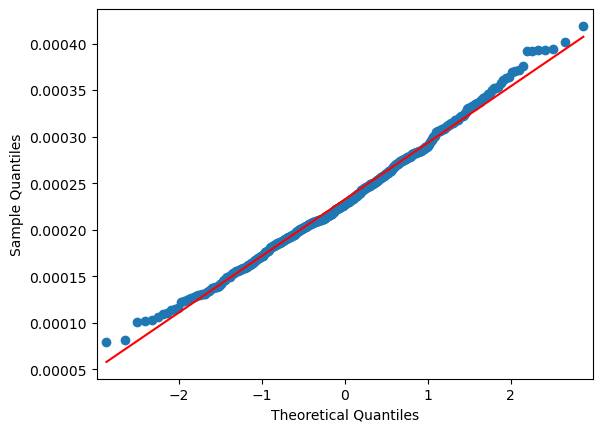

In [12]:
sm.qqplot(np.array(zeiten[0]),line="s")
plt.show()

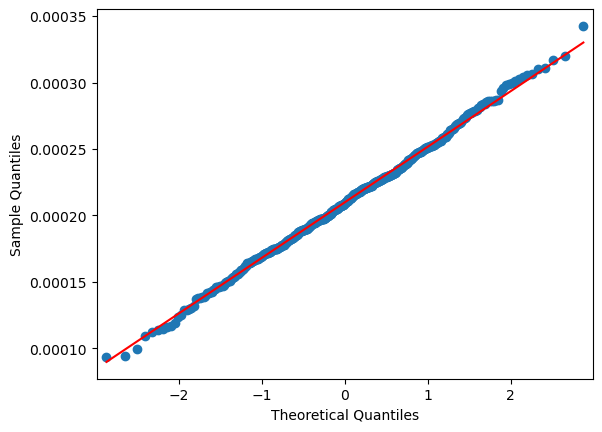

In [13]:
sm.qqplot(np.array(zeiten[1]),line="s")
plt.show()

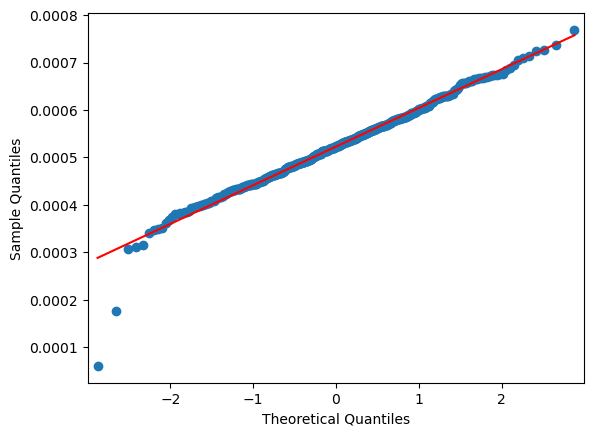

In [14]:
sm.qqplot(np.array(zeiten[2]),line="s")
plt.show()

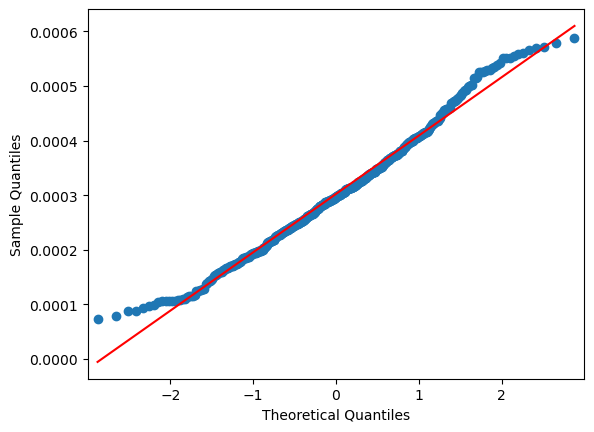

In [15]:
sm.qqplot(np.array(zeiten[3]),line="s")
plt.show()

Die Diagramme lassen darauf schließen, dass die Verteilungen wahrscheinlich normalverteilt sind.

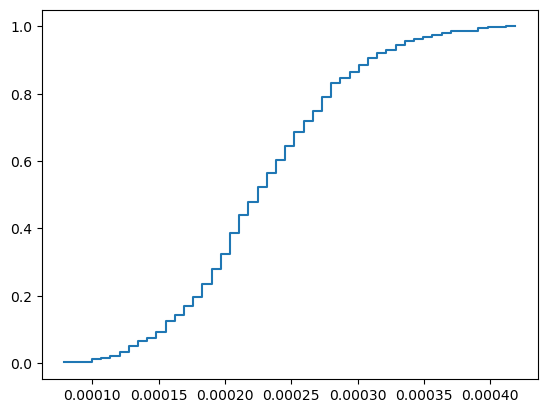

In [16]:
ecdf = edf.ECDF(zeiten[0])

x = np.linspace(min(zeiten[0]), max(zeiten[0]))
y = ecdf(x)
plt.step(x, y)

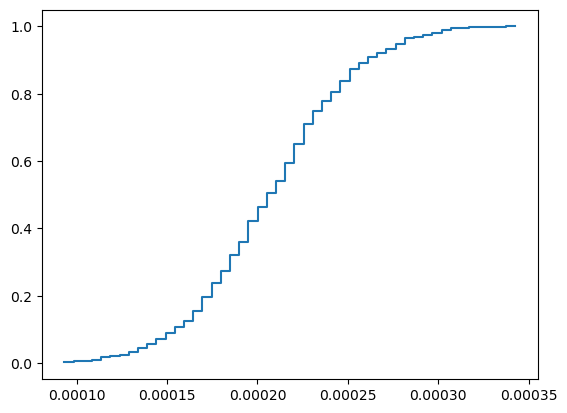

In [17]:
ecdf = edf.ECDF(zeiten[1])

x = np.linspace(min(zeiten[1]), max(zeiten[1]))
y = ecdf(x)
plt.step(x, y)

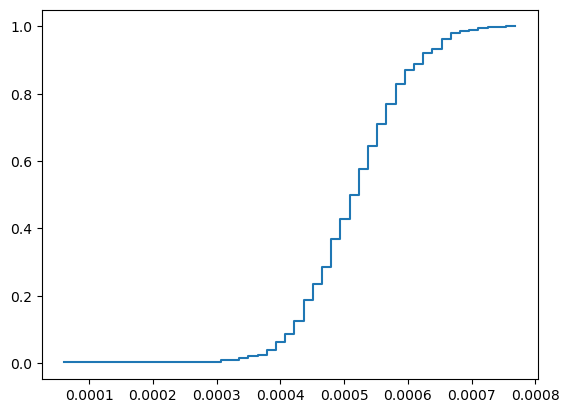

In [18]:
ecdf = edf.ECDF(zeiten[2])

x = np.linspace(min(zeiten[2]), max(zeiten[2]))
y = ecdf(x)
plt.step(x, y)

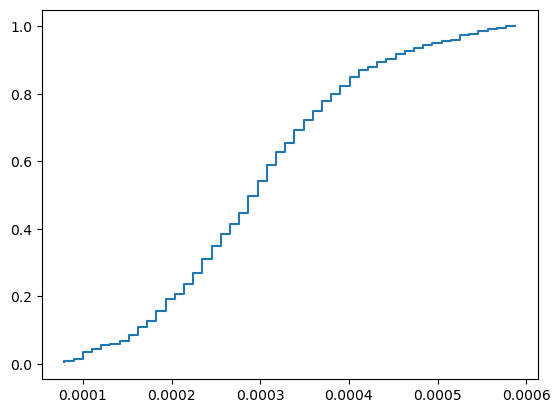

In [19]:
ecdf = edf.ECDF(zeiten[3])

x = np.linspace(min(zeiten[0]), max(zeiten[3]))
y = ecdf(x)
plt.step(x, y)

Auch diese Diagramme lassen darauf schließen, dass die Daten normalverteilt sind. Zusätzlich lässt sich vermuten, dass die Verteilungsfunktion stetig ist, wie im Wilcoxon-Test gefordert.

Insgesamt lässt sich vermuten, dass die Verteilungen alle normalverteilt (somit identisch verteilt), unabhängig und stetig sind. Somit sind alle Vorraussetzungen für die Welch- und Wilcoxon-Tests erfüllt. 

$$\textbf{Aufgabe 3.2}$$


$H0: \Theta \neq \Theta_{0}$   $\textbf{vs.}$ $H1: \Theta = \Theta_{0}$



$\textbf{Nicht relevant für Aufgabe}$\
$\textit{Erklärung der Begriffe:}$\
Signifikanzniveau $\alpha$ gibt Wahrscheinlichkeit an,dass wahre Nullhypothese (H0) fälschlicherweise abgelehnt wird.\
Gütefunktion gibt für alle Parameterwerte die Wahrscheinlichkeit an, die Nullhypothese abzulehnen.\
Für $\theta$ aus $\Theta_{0}$: Gütefunktion misst Wahrscheinlichkeit H0 abzulehnen, obwohl richtig --> Deswegen hier möglichst kleinen Wert für einen guten Test .\
Für $\theta$ aus $\Theta_{1}$: Gütefunktion misst Wahrscheinlichkeit H0 abzulehnen, wenn falsch ist --> Deswegen hier möglichst großen Wert für guten Test.\
--> Fehler 1.Art : Wahrscheinlichkeit Nullhypothese ablehnen, obwohl sie richig ist. Durch $\alpha$ angegeben \
--> Fehler 2.Art : Wahrscheinlichkeit Nullhypothese nicht abzulehnen, obwohl falsch ist \
Kritische Bereich festgelegt, sodass  Wahrscheinlichkeit in diesem Bereich gleich dem Signifikanzniveau $\alpha$ entspricht, wenn Nullhypothese wahr ist.



Beispiel für einen zweiseitigen Test mit dem Parameter $\mu$:
\
Hier ist die Nullhypothese wahr für $\mu = \mu_{0}$.\
Das heißt eine Ablehnung der wahren Nullhypothese (Fehler 1.Art) führt zu einer Wahrscheinlichkeit P(H1/H0)= $\alpha$.\
Somit ist dort (für $\mu = \mu_{0}$.) ein Minimum in der Gütefunktion (da Gütefunktion für eine wahre Nullhypothese möglichst klein ist)
\
Für alle anderen Werte von $\mu$, gilt die Alternativhypothese und die Nullhypothese wird abgelehnt.
Dort ist dann die Gütefunktion größer (da eigentlich Nullhypothese richtig wäre), d.h. Gütefunktion wächst mit zunehmenden Abstand des Wertes $\mu$ von $\mu_{0}$.
\
![alt text](gütefunktion.png "Title")

Das bedeutet: \
Für die Fälle, dass Nullhypothese nicht abgelehnt wird, obwohl diese falsch ist. D.h. für einen wahren Parameter-Wert von $\mu_{i} \neq \mu_{0}$.\
\
Bsp: Für einen wahren Parameter Wert von $\mu_{1}$ mit einer großen Abweichung zu $\mu_{0}$, ist der Fehler 2.Art ($\beta$) kleiner als für einen Parameter $\mu_{2}$ mit einer kleinen Abweichung zu $\mu_{0}$. Für $\mu_{2}$ ist der Fehler 2.Art groß.

Quelle: https://wikis.hu-berlin.de/mmstat/Gütefunktion_des_Gauß-Tests



$\textbf{Anwendung auf die Aufgabe:}$

Das Signifikanzniveau $\alpha$ gibt die Wahrscheinlichkeit an, dass Nullhypothese H0 fälschlicherweise abgelehnt wird, obwohl diese richtig ist. Dass heißt, $\alpha$ ist Wahrscheinlichkeit $\theta \neq \theta_{0}$, obwohl eigentlich $\theta = \theta_{0}$ richtig wäre. Hier sollte die Gütefunktion möglichst klein sein, da eigentlich H0 richtig ist.
\
\
Gütefunktion (der Nullhypothese) ist stetig, sodass diese sich kontinuierlich für $\theta$ verändert. Wenn $\theta$ sich $\theta_{0}$ nähert folgt, dass die Güte sich auch dem Wert der Güte von $\theta_{0}$ nähert. \
Das Problem ist, dass die Alternative nur aus einem Punkt besteht, nämlich $\theta = \theta_{0}$, aber gleichzeitig die Gütefunktion stetig ist. Somit wird die Gütefunktion, um $\theta_{0}$ nicht plötzlich auf null springen, sondern einen Wert größer als null haben. Das bedeutet, dass um den Punkt $\theta_{0}$, es eine Wahrscheinlich gibt die Nullhypothese zu verwerfen, obwohl diese richtig wäre. Somit ist der Test nicht sinnvoll konzipiert. 

\
$\textit{Alternative:}$\
Für den Fall, dass eine Nullhypothese H0, welche falsch ist, auch verworfen wird, ist dies ein korrektes Ergebnis. Somit gibt es keinen Fehler 1.Art (Signifikanzniveau $\alpha$) und die Gütefunktion muss an dieser Stelle null sein (absolutes Minimum). \
D.h. Dieser Fall ist das bestmögliche Ergebnis, sodass jeder andere Test (wie beispielsweise der Test mit dem Hypothesenpaar $H0: \Theta \neq \Theta_{0}$   $\textbf{vs.}$ $H1: \Theta = \Theta_{0}$ ) eine schlechtere Güte ergibt.\


$$\textbf{Aufgabe 3.3}$$



(a) Eine Person formuliert die Hypothese, die sie nachweisen m¨ochte, als H0. Ist dies ein sinnvolles
Vorgehen? Begr¨unden Sie Ihre Antwort. \
(b) Es wird die Hypothese
H0 : Stichprobe ist normalverteilt vs. H1 : Stichprobe ist nicht normalverteilt
zum Niveau α = 0.05 getestet. Dabei ergibt sich ein p-Wert von 0.08. Die Nullhypothese kann
also nicht abgelehnt werden. Die Person, die den Test durchgef¨uhrt hat, ist sich nun sicher, dass
ihre Stichprobe normalverteilt ist. Ist dies sinnvoll? Wie f¨allt Ihre Antwort bei einem p-Wert von
0.75 aus? Begr¨unden Sie Ihre Antworten. \
(c) Eine Person erh¨alt ein signifikantes Testergebnis. Kann sie sich sicher sein, dass sie damit etwas
wissenschaftlich relevantes herausgefunden hat? Begr¨unden Sie Ihre Antwort.

$\textit{Antworten}:$

(a): Nein, es wird die zu nachweisende Hypothese als Alternativhypothese H1 formuliert und die Nullhypothese H0 gibt die Gegenannahme. Dies liegt daran, da der Test darauf ausgelegt ist, die Nullhypothese zu widerlegen. Alle vorliegenden Test sind mit dieser Konvention erstellt, sodass es einen grundlegenden Unterschied gäbe und alle Test, um die Hypothese zu prüfen ebenfalls geändert werden müssten. Beispiele sind hierfür, unteranderm das Signifikanzniveau $\alpha$, welches auf der Wahrscheinlichkeit der Nullhypothese abzulehnen basiert und damit ein Entscheidungskritierum ermöglicht. \
Es wäre somit unteranderem auch nicht wissenschaflich Vergleichbar und somit ein wenig sinnlos.\
\
(b): Nein, wenn die Nullhypothese nicht widerlegt wird, kann man nicht automatisch annehmen, dass diese richtig ist. Für einen p-Wert von 0.75 zeigt, dass wahrscheinlich die Nullhypothese annehmbar ist, jedoch könnte sie immernoch falsch sein (es gibt keinen 100% p-Wert ). Deswegen ist keine Aussage möglich, ob es sich um eine normalverteilte Stichprobe handelt.\
\
(c): Signifikantes Ergebnis zeigt, dass eine Abweichung von der Nullhypothese größer als eine zufällige ist. Somit kann die Nullhypothese abgelehnt werden, wodurch es sich um ein wissenschaftliches Ergebnis handelt, jedoch sollte aufjedenfall das entsprechnende Signifikanzniveau mit angegeben werden.